<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет, спасибо за большое количество советов, обязательно учту в будущих работах!</div>    

# Обучение с учителем: качество модели


## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


## Описание данных

**market_file.csv** - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv** - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например,'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**market_time.csv** - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**money.csv** - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Импорт необходимых библиотек

In [1]:
pip install shap -q

In [2]:
pip install phik --q

In [3]:
pip install -U scikit-learn -q

In [4]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import seaborn as sns
import shap

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

from phik import phik_matrix

warnings.filterwarnings("ignore")

In [5]:
RANDOM_STATE=12345
TEST_SIZE=0.25

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
try:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal = ',')
except:    
    market_file = pd.read_csv('/datasets/market_file.csv')
    market_money = pd.read_csv('/datasets/market_money.csv')
    market_time = pd.read_csv('/datasets/market_time.csv')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

Выведем все датафреймы и проверим на соответствие описанию

In [8]:
market_file.head()

In [9]:
market_money.head()

In [10]:
market_time.head()

In [11]:
money.head()

### Промежуточный вывод

Все данные на месте и соответствуют описанию, единственное столбцы Маркет_актив_6_мес следует привести к целому числу

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправлено </div> 

## Шаг 2. Предобработка данных

### Таблица market_file

In [12]:
market_file.info()

Напишем функцию для вывода основной информации о таблицах 

In [13]:
def analyze_dataframe(df_name):
    df = globals()[df_name]
    
    print("Первые пять строк таблицы:")
    display(df.head(5))
    print()
    
    print("Информация о таблице:")
    display(df.info())
    print()
    
    print("Статистическое описание таблицы:")
    display(df.describe())
    print()
    
    num_missing_values = df.isnull().sum().sum()
    total_cells = df.size
    percentage_missing = (num_missing_values / total_cells) * 100
    print("Количество пропусков: ", num_missing_values)
    print("Процент пропусков: ", percentage_missing, "%")
    print()
    
    num_duplicates = df.duplicated().sum()
    percentage_duplicates = (num_duplicates / df.shape[0]) * 100
    print("Количество дубликатов: ", num_duplicates)
    print("Процент дубликатов: ", percentage_duplicates, "%")

In [14]:
analyze_dataframe("market_file") 

In [15]:
market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype('int64')

In [16]:
market_file.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in market_file.columns]

In [17]:
market_file.head()

Типы данных соответствуют, пропуски и дубликаты отсутствуют. Сильных аномальных значений также не наблюдается

### Таблица market_money

In [18]:
analyze_dataframe("market_money") 

In [19]:
market_money.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in market_money.columns]

In [20]:
market_money.head()

Типы данных соответствуют, пропуски и дубликаты отсутствуют. Сильных аномальных значений также не наблюдается

### Таблица market_time

In [21]:
analyze_dataframe("market_time") 

In [22]:
market_time.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in market_time.columns]

In [23]:
market_time.head()

Типы данных соответствуют, пропуски и дубликаты отсутствуют. Аномальных значений также не наблюдается

### Таблица money

In [24]:
analyze_dataframe("money") 

Типы данных соответствуют, пропуски и дубликаты отсутствуют. Аномальных значений также не наблюдается

In [25]:
money.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in money.columns]

In [26]:
money.head()

### Промежуточный вывод

Столбцы было принято решение оставить в изначальном виде. Во всех датафреймах отсутствуют пропуски и дублирующиеся строчки. Аномальных значений также не замечено, более подробный анализ будет проведен в следующем шаге

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправлено </div>  

## Шаг 3. Исследовательский анализ данных

### Таблица market_file

In [27]:
market_file.head()

In [28]:
num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'
]

Изучим распределение количественных столбцов 

In [29]:
def plot_boxplots(dataframe, num_columns):
    num_plots = len(num_columns)
    num_cols = min(2, num_plots)  # Определение количества столбцов
    num_rows = (num_plots + 1) // num_cols  # Определение количества строк
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))  # Создание сетки графиков

    for i, column in enumerate(num_columns):
        row = i // num_cols  # Определение номера строки
        col = i % num_cols  # Определение номера столбца

        ax = axes[row, col] if num_rows > 1 else axes[col]
        dataframe.boxplot(column=column, ax=ax)  # Построение боксплота
        ax.set_title(f"Боксплот для столбца {column}")  # Название графика
        ax.set_xlabel("Столбец")  # Подпись оси X
        ax.set_ylabel("Значение")  # Подпись оси Y

    plt.tight_layout()  # Автоматическое выравнивание графиков
    plt.show()  # Отображение графиков


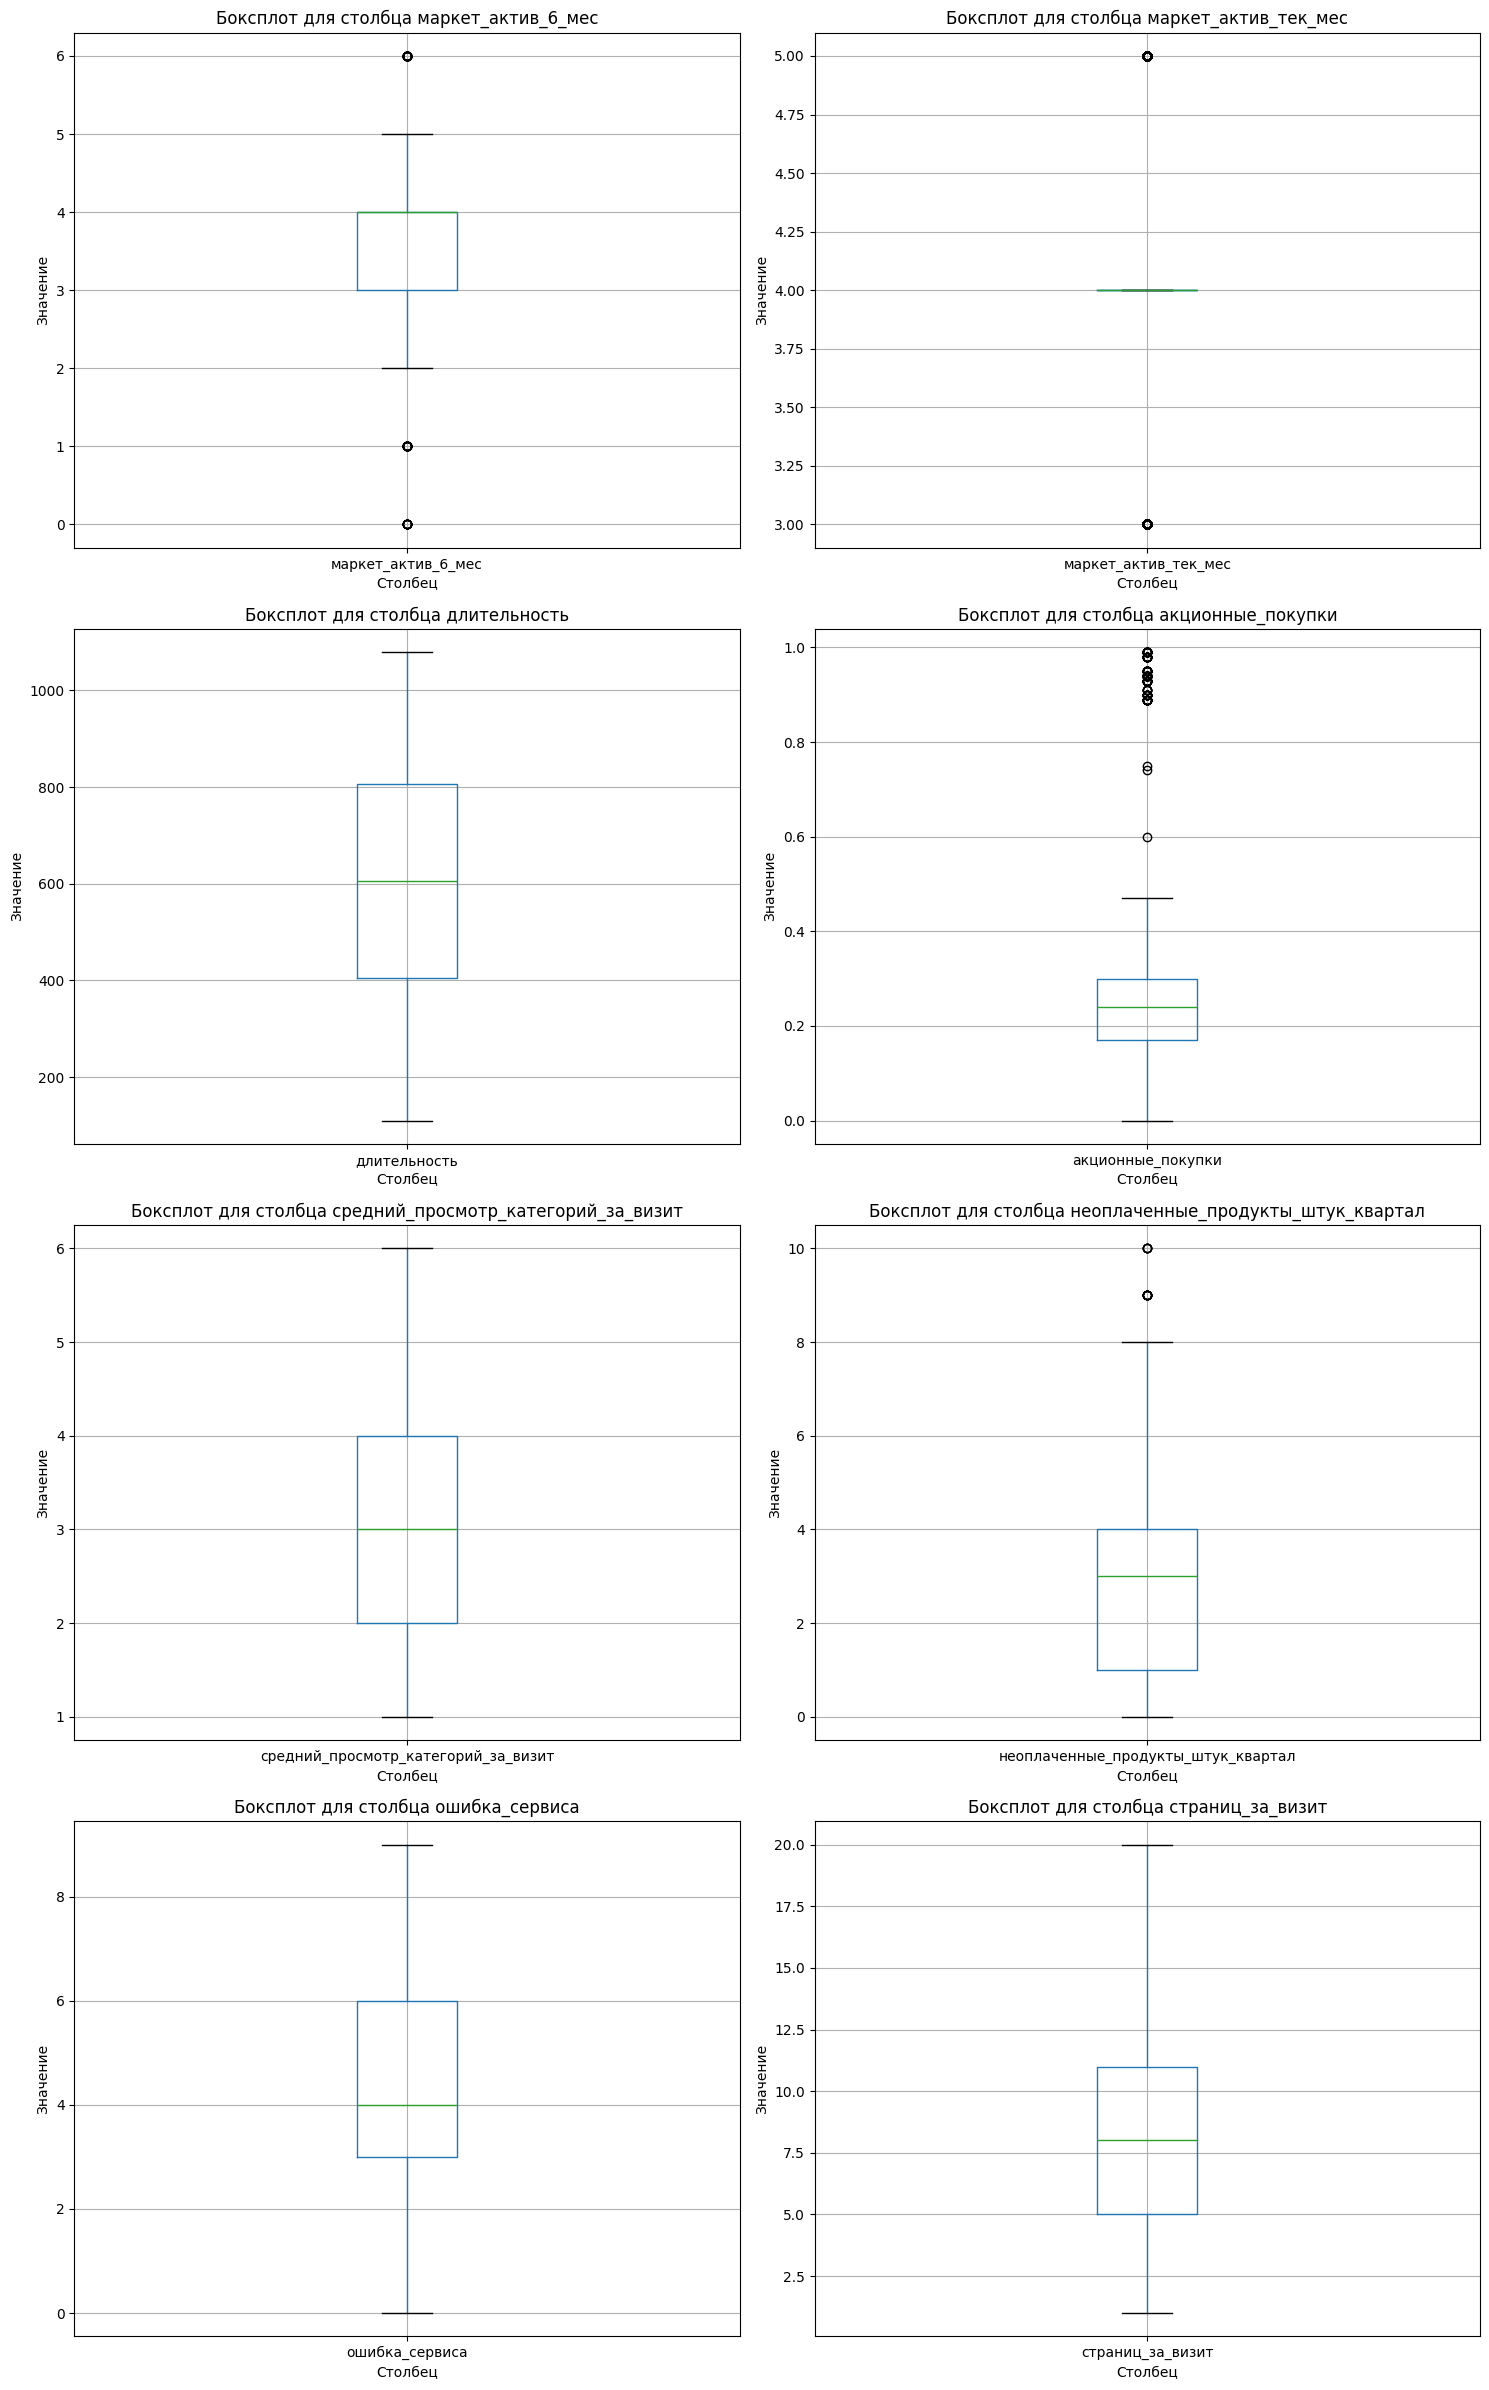

In [30]:
plot_boxplots(market_file, num_columns)

Напишем функцию для отображения гистограмм количественных столбцов

In [31]:
def plot_histograms(dataframe, num_columns):
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2  # Определение количества строк

    fig = make_subplots(rows=rows, cols=2, subplot_titles=num_columns)  # Создание subplot с двумя столбцами

    for i, column in enumerate(num_columns):
        row = (i // 2) + 1  # Определение текущей строки гистограммы
        col = (i % 2) + 1  # Определение текущего столбца гистограммы
        fig.add_trace(go.Histogram(x=dataframe[column], nbinsx=20), row=row, col=col)  # Добавление гистограммы в subplot

        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', row=row, col=col)  # Отображение сетки на оси X
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', row=row, col=col)  # Отображение сетки на оси Y

        fig.update_xaxes(title_text=column, row=row, col=col)  # Добавление подписи оси X
        fig.update_yaxes(title_text='Количество', row=row, col=col)  # Добавление подписи оси Y

    fig.update_layout(showlegend=False, height=400*rows, width=900, title_text="Гистограммы")  # Настройка общего заголовка и размеров subplot
    fig.show()  # Отображение гистограмм

In [32]:
def plot_histograms_one(dataframe, num_columns):
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2
    
    # Define colors for the activity levels
    colors = ['blue', 'red']

    fig = make_subplots(rows=rows, cols=2, subplot_titles=num_columns)

    for i, column in enumerate(num_columns):
        row = (i // 2) + 1
        col = (i % 2) + 1
        fig.add_trace(go.Histogram(x=dataframe[dataframe["покупательская_активность"] == "Прежний уровень"][column], 
                                   nbinsx=20,
                                   name="Прежний уровень",
                                   marker=dict(color=colors[0])), row=row, col=col)
        fig.add_trace(go.Histogram(x=dataframe[dataframe["покупательская_активность"] == "Снизилась"][column], 
                                   nbinsx=20,
                                   name="Снизилась",
                                   marker=dict(color=colors[1])), row=row, col=col)

        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', row=row, col=col)
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', row=row, col=col)

        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_yaxes(title_text='Count', row=row, col=col)

    # Create a single legend
    fig.update_layout(showlegend=True, 
                      height=400*rows, width=1000, title_text="Histograms", legend=dict(traceorder='normal'))

    fig.show()

In [33]:
plot_histograms_one(market_file, num_columns)

In [34]:
market_file.head()

In [35]:
market_file.describe()

Большинство столбцов имеют нормально распределение. 

- 'Маркет_актив_6_мес'. Зачастую на покупателя приходится примерно 4 маркетинговых активности за 6 месяцев. Всего может быть от 0 до 6.


- 'Маркет_актив_тек_мес'. Чаще всего за месяц на покупателя приходится 4 маркетинговых активности. Реже - 3 или 5. Интересно, что среднее значение такое же, как и за 6 месяцев.


- 'Длительность' - в среднем у пользователей прошло примерно 600 дней с момента регистрации, что равняется 20 месяцам. В целом значение варьируется от 110 до 1000 и распределено довольно равномерно.

- 'Акционные_покупки' - большинство пользователей не совершали покупки по акции.

- 'Средний_просмотр_категорий_за_визит' - чаще всего просматривают 3 категории за визит.

- 'Неоплаченные_продукты_штук_квартал' - обычно покупатели не оплачивают 3 добавленых в корзину товара за 3 месяца.

- 'Ошибка_сервиса' - на сервисе довольно часто происходят сбои - на одного пользователя приходится от 0 до 9 сбоев. Среднее значение - 4 сбоя.

- 'Страниц_за_визит' - чаще всего за один визит покупатель открывает 8 страниц.

Изучим категориальные признаки

In [36]:
market_file.head()

In [37]:
cat_columns = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

In [38]:
def print_unique_values(columns, data):
    for column in columns:
        unique_values = set(data[column])
        display(f"Уникальные значения в столбце '{column}': {unique_values}")

In [39]:
print_unique_values(cat_columns, market_file)

В столбце 'Тип сервиса' присутствует опечатка, исправим ее 

In [40]:
market_file['тип_сервиса'].value_counts()

In [41]:
market_file.loc[market_file['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'

In [42]:
market_file['тип_сервиса'].value_counts()

In [43]:
def create_pie_charts(data, columns):
    for column in columns:
        counts = data[column].value_counts()

        df = pd.DataFrame({column: counts.index, 'count': counts.values})

        fig = px.pie(df, values='count', names=column, title=f'Круговая диаграмма для {column}')
        fig.show()

In [44]:
create_pie_charts(market_file, cat_columns)

Всего магазин продает 6 категорий товара:
- 'Техника для красоты и здоровья', 
- 'Кухонная посуда', 
- 'Косметика и аксесуары', 
- 'Мелкая бытовая техника и электроника', 
- 'Домашний текстиль', 
- 'Товары для детей'

Они представлены примерно равномерно, однако больше всего представлена категория товаров для детей и домашнего текстиля. Меньше всего приходится на кухонную посуду.

Рассматривая пользователей, можно отметить, что активность 60% процентов находиться на прежнем уровне, более 70% пользователей пользуется стандартным уровнем сервиса и согласны на получение дополнительных предложений о товаре.

В нашем целевом признаке наблюдается дисбаланс, поэтому будем использовать метрику roc_auc

### Таблица market_money

In [45]:
market_money.head()

In [46]:
num_col = ['выручка']
cat_col = ['период']

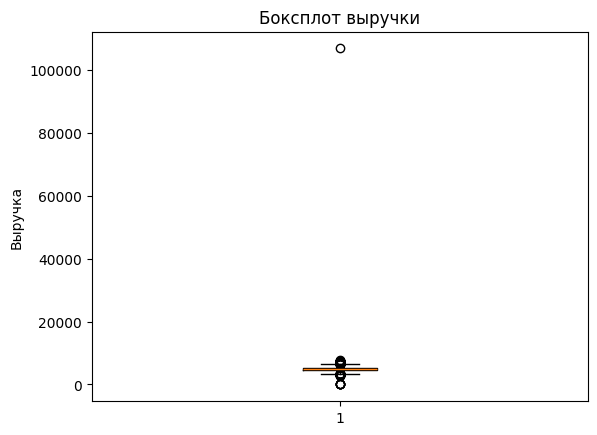

In [47]:
plt.boxplot(market_money['выручка'])

plt.title('Боксплот выручки')
plt.ylabel('Выручка')

plt.show()

In [48]:
plot_histograms(market_money, num_col)

Одно аномальное значение все же присутствует, удалим его и построим графики заново

In [49]:
market_money.drop(market_money[market_money['выручка'] > 20000].index, inplace=True)

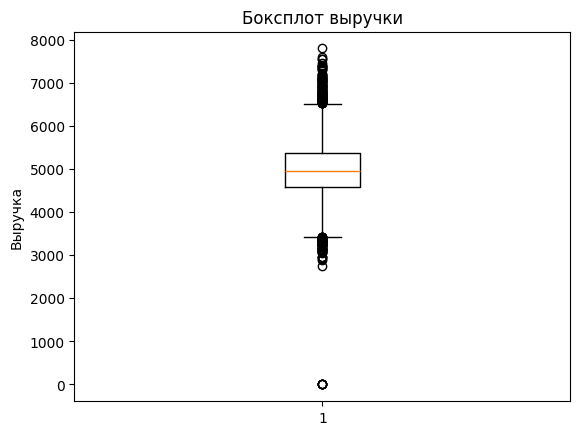

In [50]:
plt.boxplot(market_money['выручка'])

plt.title('Боксплот выручки')
plt.ylabel('Выручка')

plt.show()

In [51]:
plot_histograms(market_money, num_col)

In [52]:
count_zero_revenue = len(market_money[market_money['выручка'] == 0])
zero_revenue_rows = market_money[market_money['выручка'] == 0]
print("Количество строк с нулевой выручкой:", count_zero_revenue)
print("Строки с нулевой выручкой:")
display(zero_revenue_rows)

У нас 3 клиента, которые не покупали что-либо в эти три месяца. Удалим такие строчки, ведь нам нужны только те пользователи, оторые совершали покупки

In [53]:
ids_to_remove = zero_revenue_rows['id'].unique()

In [54]:
market_money = market_money[~market_money['id'].isin(ids_to_remove)]

In [55]:
plot_histograms(market_money, num_col)

Также рассмотрим выручку по периодам 

In [56]:
fig = px.histogram(market_money, x='выручка', nbins=10, facet_col='период', facet_col_wrap=3)

fig.update_layout(
    title='Распределение выручки по периодам',
    xaxis=dict(title='Выручка'),
    yaxis=dict(title='Частота')
)

fig.show()

Самые высокие значения выручки в предпредыдущем месяце. В текущем и предыдущем месяцах распределение пости одинаковое

In [57]:
print_unique_values(cat_col, market_money)

In [58]:
create_pie_charts(market_money, cat_col)

Периоды представлены равномерно

### Таблица market_time

In [59]:
market_time.head()

In [60]:
num_col_1 = ['минут']
cat_col_1 = ['период']

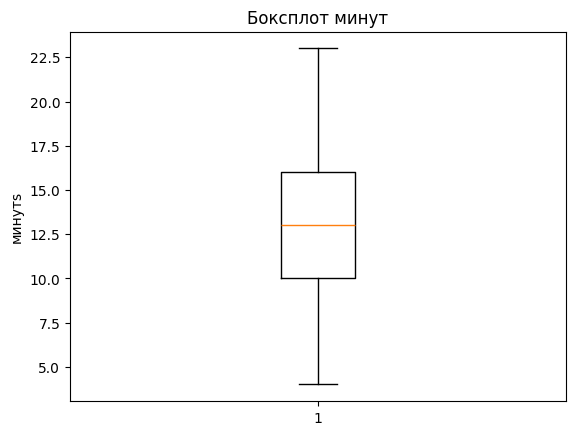

In [61]:
plt.boxplot(market_time['минут'])

plt.title('Боксплот минут')
plt.ylabel('минутs')

plt.show()

In [62]:
plot_histograms(market_time, num_col_1)

Минуты распределены нормально, чаще всего на сайте проводят около 10-15 минут

In [63]:
print_unique_values(cat_col_1, market_time)

In [64]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [65]:
create_pie_charts(market_time, cat_col_1)

Периоды распределены равномерно

## Шаг 4. Объединение таблиц

Сначала создадим отдельные столбцы для каждого из периодов

In [66]:
time_pivot = market_time.pivot_table(index=['id'],columns=['период'],values=['минут'])
time_pivot.columns = ['минуты_предыдущий_месяц','минуты_текущий_месяц']
time_pivot = time_pivot.reset_index()
time_pivot.head()

In [67]:
money_pivot = market_money.pivot_table(index=['id'],columns=['период'],values=['выручка'])
money_pivot.columns = ['выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']
money_pivot = money_pivot.reset_index()
money_pivot.head()

In [68]:
money_pivot.isna().sum()

В ходе создания сводной таблице у нас появился один пропуск, заполним его медианным значением по текущему месяцу

In [69]:
median_revenue = money_pivot['выручка_текущий_месяц'].median()
money_pivot['выручка_текущий_месяц'].fillna(median_revenue, inplace=True)

Объединим полученные таблицы

In [70]:
market_file.reset_index(inplace=True,drop=True)
time_pivot.reset_index(inplace=True,drop=True)
money_pivot.reset_index(inplace=True,drop=True)

In [71]:
df = market_file.merge(time_pivot, on='id',how='inner').merge(money_pivot, on='id', how='inner')
df.head()

In [72]:
analyze_dataframe("df")

Данные успешно объединены

### Портрет покупателя со сниженной активностью

В среднем они просматривают две категории за визит, имеют от двух до пяти неоплаченных продуктов за квартал, сталкиваются с двумя-четырьмя ошибками сервиса. Они посещают значительно меньше страниц за визит, чем активные пользователи, — от 2,5 до 5. Преобладающий тип сервиса — стандарт. Кроме того, они часто соглашаются на рассылку, что позволяет использовать этот канал для их дальнейшего привлечения.

## Шаг 5. Корреляционный анализ

In [73]:
corr_matrix = df.phik_matrix()

corr_matrix


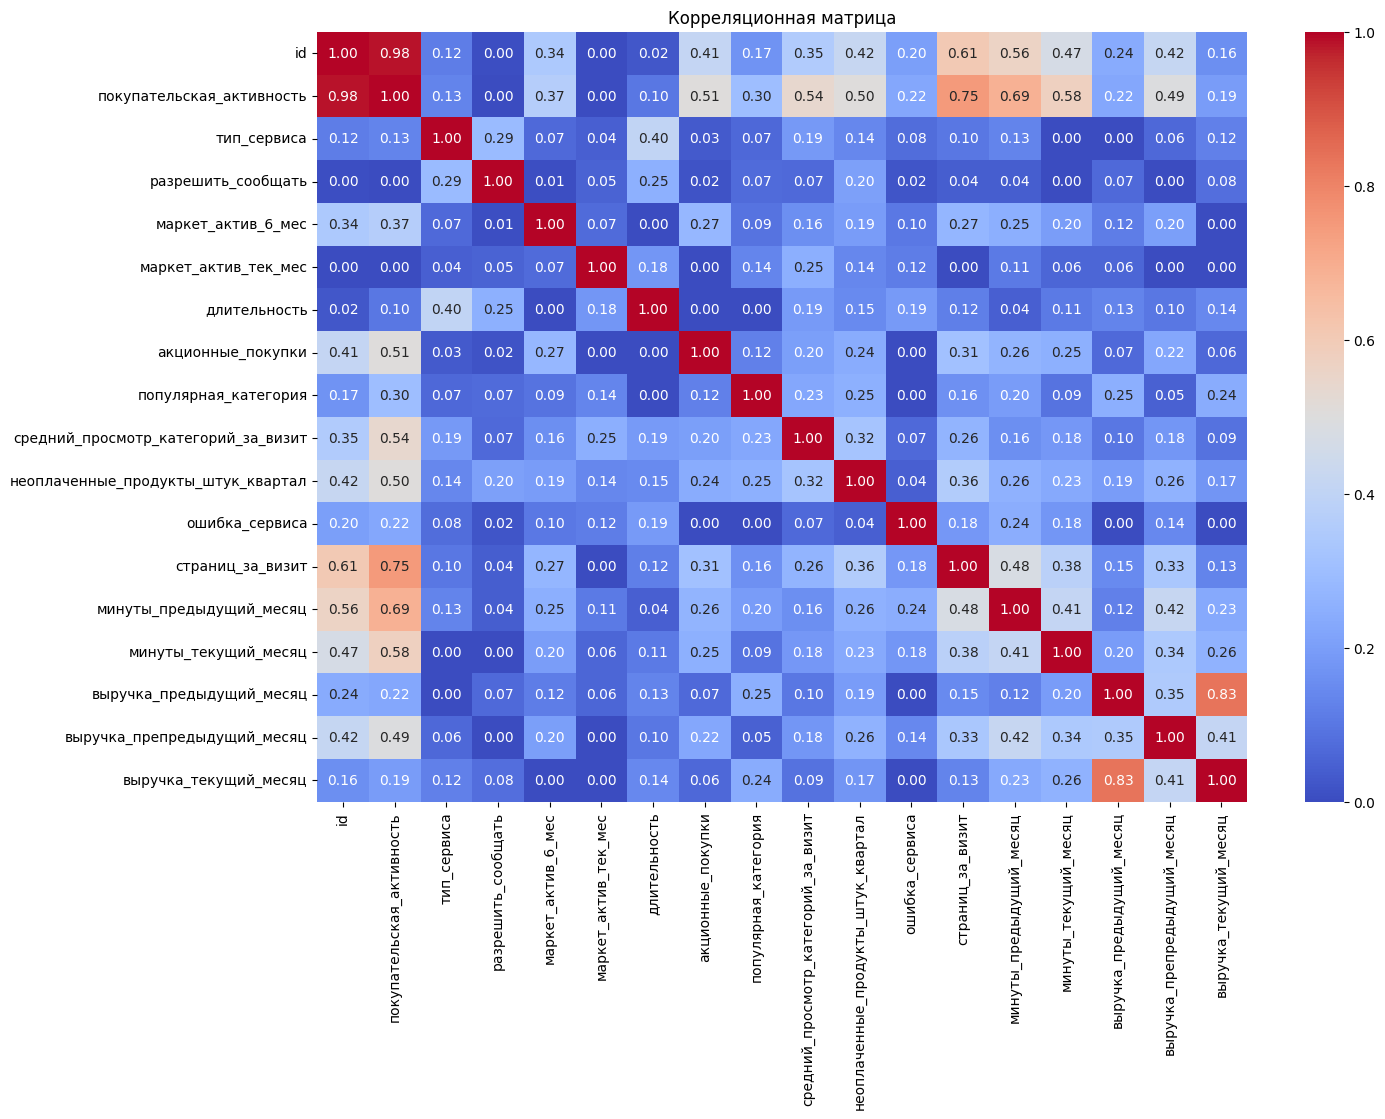

In [74]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Сильная корреляция наблюдается у id и покупательской активности. id мы можем удалить, так как в любом случае не будем использовать этот столбец при обучении. В остальном все признаки коррелируют в предлеах нормы. Высокая корреляция у выручки за предыдущий месяц и выручки в текущий месяц, но она меньше 0.9, поэтому мы можем ее оставить 


In [75]:
df.set_index('id', inplace=True)

In [76]:
df_full_corr = df.copy()
df_full_corr.phik_matrix()

In [77]:
df_full_corr = df.copy()

In [78]:
df_full_corr.phik_matrix().iloc[:,1]

In [79]:
df_lower = df_full_corr[df_full_corr['покупательская_активность'] == 'Снизилась']

In [80]:
df_lower = df_lower.phik_matrix()
df_lower

In [81]:
df_full_corr[df_full_corr['покупательская_активность'] == 'Прежний уровень'].phik_matrix()

О мультиколлинеарности принято говорить если коэффициент корреляции 0.9 и более. В нашей таблице такого нет

In [82]:
df_project = df_full_corr

In [83]:
df_project.head()

In [84]:
df_project.shape

## Шаг 6. Использование пайплайнов

In [85]:
df_project.loc[df['покупательская_активность'] == 'Снизилась', 'покупательская_активность'] = 1
df_project.loc[df['покупательская_активность'] == 'Прежний уровень', 'покупательская_активность'] = 0

In [86]:
df_project['покупательская_активность'] = df_project['покупательская_активность'].astype('int64')

In [87]:
df_project.isna().sum()

In [88]:
df_project.shape

В наших данных нет пропусков

Разделим на выборки

In [89]:
df_train, df_test = train_test_split(df_project, test_size=0.25, random_state=RANDOM_STATE)

In [90]:
X_train = df_train.drop(['покупательская_активность'], axis=1)
y_train = df_train['покупательская_активность']
X_test = df_test.drop(['покупательская_активность'], axis=1)
y_test = df_test['покупательская_активность']

In [91]:
print('Размер тренировочной выборки', df_train.shape)

In [92]:
print('Размер тестовой выборки', df_test.shape)

Введём обозначения для типов исходных данных

In [93]:
ohe_columns = [
    'тип_сервиса', 
    'разрешить_сообщать', 
    'популярная_категория'
]

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'минуты_предыдущий_месяц',
    'минуты_текущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц'
]

Теперь перейдем к созданию паплайна для обучения. Мы будем использовать следующие модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(). Для определения лучшей можеди мы будем использовать метрику ROC-AUC. ROC-AUC обладает хорошей робастностью к несбалансированным классам.  Кроме того, ROC-AUC позволяет сравнивать модели по качеству ранжирования — насколько выше модель ставит объекты положительного класса по сравнению с отрицательными.
По сравнению с метриками F1, recall или precision, ROC-AUC учитывает все возможные пороги классификации, а не один фиксированный, что делает её особенно полезной на этапах отбора моделей и настройки порогов в продакшене.

In [94]:
ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
    ]
)

In [95]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [96]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
 
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
 
 
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }, 
    
    # словарь для модели SVC()
    
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
]

In [97]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [98]:
%%time 

randomized_search.fit(X_train, y_train)

In [99]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

In [100]:
cv_results = pd.DataFrame(randomized_search.cv_results_)

cv_results.head(10)

In [101]:
probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1] 
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

- По итогам обучения лучшей моделью на тренировочной выборке оказалась KNeighborsClassifier(n_neighbors=8), ее roc_auc равен  0.901985


- Площадь ROC-кривой на тестовой выборке 0.9102196559799726

## Шаг 7. Анализ важности признаков

In [102]:
# В best_model будет храниться наш пайплайн
best_model = randomized_search.best_estimator_
kn_model = best_model.named_steps['models']

In [103]:
X_train = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test = best_model.named_steps['preprocessor'].transform(X_test)

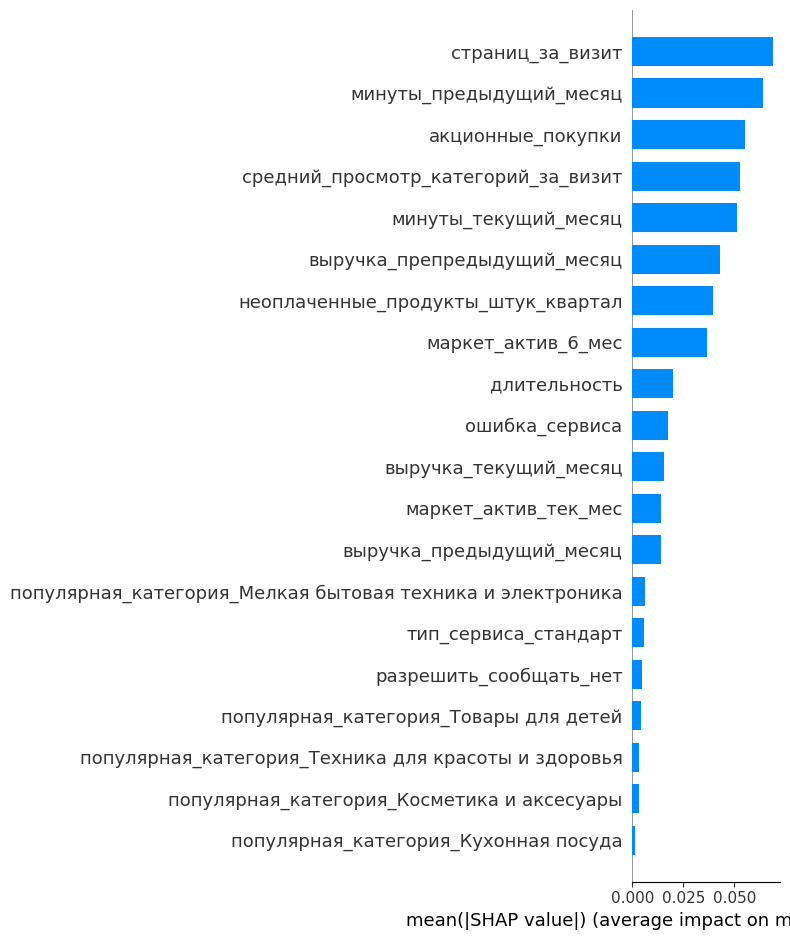

In [104]:
explainer = shap.Explainer(kn_model.predict_proba, X_train)
shap_values = explainer(X_test)

features_out = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out().tolist() + num_columns

shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar",
                  feature_names=features_out)

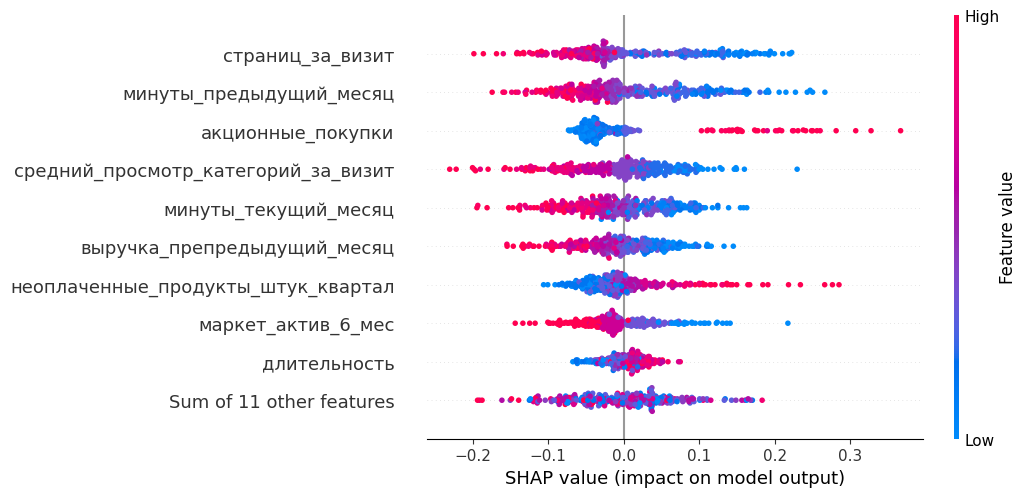

In [105]:
# Преобразуем X_train и X_test в DataFrame с названиями признаков
X_train_df = pd.DataFrame(X_train, columns=features_out)
X_test_df = pd.DataFrame(X_test, columns=features_out)

# Создаём explainer с predict_proba и X_train
explainer = shap.Explainer(kn_model.predict_proba, X_train_df)

# Получаем shap_values как Explanation
shap_values = explainer(X_test_df)

# Теперь beeswarm работает без feature_names
shap.plots.beeswarm(shap_values[:, :, 1])


### Выводы о значимости признаков

Больше всего на модель влияет признак содержащий количество страниц, которые пользователь посещает за визит и количество минут, которые пользователь проводил на сайте в предыдущий месяц. Далее идут акционные покупки, средний просмотр категорий за визит, минуты за текущий месяц и выручка за предыдущий месяц. 

Меньше всего на модель влияют категории товара и количество маркетинговых коммуникаций в текущем месяце. 

Признаки которые меньше всего влияют - следует исключить из модели. А на признаки которые больше всего влияют следует обратить особое внимание. Можно сделать вывод, что посещаемость сайта и длительность посещения сильнее всего влияют на активность пользователей. Следовательно от этого можно отталкиваться при принятии решений

## Шаг 8. Сегментация покупателей

Выделим сегмент - покупателей с высокой вероятностью ухода и высокой прибылью

In [106]:
df_project = df_project.reset_index()

In [107]:
df_clients = df_project.merge(money, on='id', how='left')

In [108]:
df_clients.head()

In [109]:
df_clients.info()

In [110]:
probabilities = randomized_search.best_estimator_.predict_proba(df_clients)[:, 1]
df_clients['probabilities'] = probabilities

In [111]:
df_clients['прибыль'].describe()

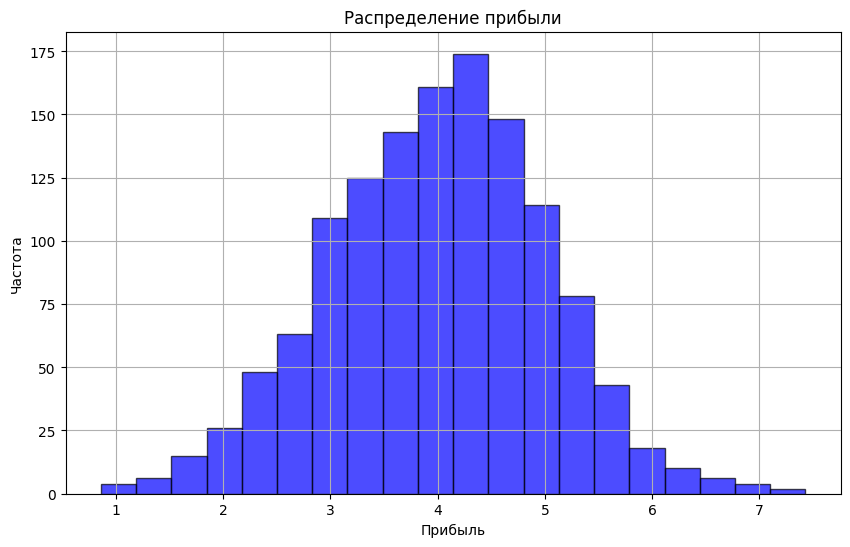

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(df_clients['прибыль'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [113]:
df_clients['probabilities'].describe()

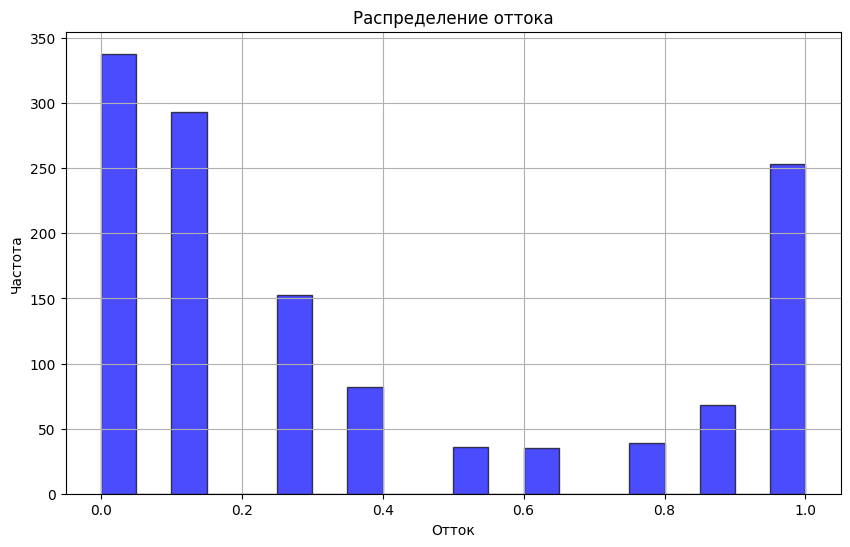

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(df_clients['probabilities'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение оттока')
plt.xlabel('Отток')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Высоким показателем прибыли будем считать значения выше 3 квартиля, а вероятность снижения активности выше 0.5

In [115]:
df_high_income = df_clients[(df_clients['probabilities'] >= 0.5) \
                            & (df_clients['прибыль'] >= 4.67)]

In [116]:
df_high_income.info()

В данном сегменте получилось 96 пользователей. Изучим данный сегмент. 

In [117]:
df_high_income['выручка_всего'] = df_high_income['выручка_препредыдущий_месяц'] + \
                df_high_income['выручка_текущий_месяц'] + df_high_income['выручка_предыдущий_месяц']
df_high_income['минуты_всего'] = df_high_income['минуты_предыдущий_месяц'] + df_high_income['минуты_текущий_месяц']

In [118]:
df_clients['выручка_всего'] = df_clients['выручка_препредыдущий_месяц'] + \
                df_clients['выручка_текущий_месяц'] + df_clients['выручка_предыдущий_месяц']
df_clients['минуты_всего'] = df_clients['минуты_предыдущий_месяц'] + df_clients['минуты_текущий_месяц']

In [119]:
print('Средняя выручка в выделенном сегмента', df_high_income['выручка_всего'].mean())
print('Средняя выручка', df_clients['выручка_всего'].mean())
print('Разница в выручке', abs(df_high_income['выручка_всего'].mean()-df_clients['выручка_всего'].mean()))

In [120]:
print('Среднее количество минут в выделенном сегмента', df_high_income['минуты_всего'].mean())
print('Среднее количество минут', df_clients['минуты_всего'].mean())
print('Разница в количестве минут', abs(df_high_income['минуты_всего'].mean()-df_clients['минуты_всего'].mean()))

In [121]:
def compare_dfs(df1, df2):
    
    for column in df1.columns:
        column_type = df1[column].dtype

        if column_type == 'object':

            fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
            
            # DataFrame 1
            counts_df1 = df1[column].value_counts(normalize=True)
            fig.add_trace(go.Pie(
                labels=counts_df1.index,
                values=counts_df1.values,
                name="DataFrame 1",
                hole=0.4
            ), row=1, col=1)

            # DataFrame 2
            counts_df2 = df2[column].value_counts(normalize=True)
            fig.add_trace(go.Pie(
                labels=counts_df2.index,
                values=counts_df2.values,
                name="DataFrame 2",
                hole=0.4
            ), row=1, col=2)

            fig.update_layout(
                title_text=f'Распределение категорий: {column}',
                annotations=[
                    dict(text="DF1", x=0.18, y=0.5, showarrow=False),
                    dict(text="DF2", x=0.82, y=0.5, showarrow=False)
                ]
            )
            fig.show()

        elif column_type in ['int64', 'float64'] and column != 'id':
            # Создаем 2x2 сетку графиков
            fig = make_subplots(
                rows=2, cols=2,
                specs=[[{"type": "xy"}, {"type": "box"}],
                       [{"type": "xy"}, {"type": "scatter"}]],
                subplot_titles=(
                    "Гистограммы", 
                    "Боксплоты",
                    "Наложенные гистограммы",
                    ""
                )
            )

            # Гистограммы
            fig.add_trace(go.Histogram(
                x=df1[column],
                name='DF1',
                opacity=0.75,
                marker_color='blue'
            ), row=1, col=1)

            fig.add_trace(go.Histogram(
                x=df2[column],
                name='DF2',
                opacity=0.75,
                marker_color='orange'
            ), row=1, col=1)

            # Боксплоты
            fig.add_trace(go.Box(
                y=df1[column],
                name='DF1',
                marker_color='blue'
            ), row=1, col=2)

            fig.add_trace(go.Box(
                y=df2[column],
                name='DF2',
                marker_color='orange'
            ), row=1, col=2)

            # Наложенные гистограммы
            fig.add_trace(go.Histogram(
                x=df1[column],
                name='DF1',
                opacity=0.5,
                marker_color='blue'
            ), row=2, col=1)

            fig.add_trace(go.Histogram(
                x=df2[column],
                name='DF2',
                opacity=0.5,
                marker_color='orange'
            ), row=2, col=1)

            fig.update_layout(
                title_text=f'Анализ признака {column}',
                barmode='overlay',
                showlegend=False,
                height=700
            )

            # Вывод статистики
            print(f"\n{column.upper()}:")
            print("DF1 Статистика:")
            print(df1[column].describe())
            print("\nDF2 Статистика:")
            print(df2[column].describe())

            fig.show()


In [122]:
compare_dfs(df_high_income, df_clients)

Покупатели данного сегмента преимущественно интересуются категориями "товары для детей" и "косметика и аксессуары", на которые приходится 31% и 27% соответственно. Это значительно больше, чем в среднем по всем данным, где эти категории составляют 25% и 19%. Кроме того, на 6% больше пользователей, приносящих высокую прибыль, предпочитают тариф "премиум". Однако пользователи данного сегмента чаще всего просматривают лишь две категории товаров. В среднем они проводят около 10 минут на сайте, что меньше среднего времени всех пользователей, а также не просматривают больше пяти страниц за визит. Это может свидетельствовать о том, что их не устраивает функционал или удобство сайта. Средняя выручка от данного сегмента также ниже, чем в среднем по всем пользователям.


### Рекомендации

На основе данных о том, где пользователи проводят больше времени, можно выявить ключевые области для улучшения. Это может включать оптимизацию навигации, добавление интерактивных элементов или упрощение процесса покупки, чтобы сделать взаимодействие с сайтом более удобным и привлекательным.

Используйте данные о просмотрах категорий и предыдущих покупках для создания персонализированных предложений. Например, можно показывать товары, которые соответствуют интересам пользователя на основании его прошлых действий, таких как просматриваемые категории или приобретенные товары.

Учитывая, что пользователи с низким уровнем активности чаще покупают товары по акции, можно стимулировать их активность с помощью специальных предложений. Это могут быть ограниченные по времени скидки, бесплатная доставка при достижении определенного объема покупки или эксклюзивные предложения для данного сегмента.

Внедрение системы бонусов или программы лояльности поможет мотивировать пользователей возвращаться и совершать повторные покупки. Это может включать начисление бонусных баллов за каждую покупку, предоставление эксклюзивных скидок и привилегий для участников программы, а также доступ к специальным предложениям только для постоянных клиентов.

# Общий вывод

Цель проекта: разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность, построить модель и, используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения

Все данные соответствовали описанию, пропусков и дубликатов нет ни в каком датафрейме. 

Исследовательский анализ данных: 

Большинство столбцов имеют близкое к нормальному распределению.

- 'Маркет_актив_6_мес'. Зачастую на покупателя приходится примерно 4 маркетинговых активности за 6 месяцев. Всего может быть от 0 до 6.

- 'Маркет_актив_тек_мес'. Чаще всего за месяц на покупателя приходится 4 маркетинговых активности. Реже - 3 или 5. Интересно, что среднее значение такое же, как и за 6 месяцев.

- 'Длительность' - в среднем у пользователей прошло примерно 600 дней с момента регистрации, что равняется 20 месяцам. В целом значение варьируется от 110 до 1000 и распределено довольно равномерно.

- 'Акционные_покупки' - большинство пользователей не совершали покупки по акции.

- 'Средний_просмотр_категорий_за_визит' - чаще всего просматривают 3 категории за визит.

- 'Неоплаченные_продукты_штук_квартал' - обычно покупатели не оплачивают 3 добавленых в корзину товара за 3 месяца.

- 'Ошибка_сервиса' - на сервисе довольно часто происходят сбои - на одного пользователя приходится от 0 до 9 сбоев. Среднее значение - 4 сбоя.

- 'Страниц_за_визит' - чаще всего за один визит покупатель открывает 8 страниц.

Всего магазин продает 6 категорий товара:

- 'Техника для красоты и здоровья',
- 'Кухонная посуда',
- 'Косметика и аксесуары',
- 'Мелкая бытовая техника и электроника',
- 'Домашний текстиль',
- 'Товары для детей'


Они представлены примерно равномерно, однако больше всего представлена категория товаров для детей и домашнего текстиля. Меньше всего приходится на кухонную посуду.

Рассматривая пользователей, можно отметить, что активность 60% процентов находиться на прежнем уровне, более 70% пользователей пользуется стандартным уровнем сервиса и согласны на получение дополнительных предложений о товаре.

В нашем целевом признаке наблюдается дисбаланс, поэтому будем использовать метрику roc_auc

В таблице market_money было обнаружено одно аномальное значение выручки, которое мы удалили. Помимо этого, мы обнаружили значения равные нулю. Так как нам надо было отберать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период, то мы удалили клиентов с нулевыми значениями. 

Следующим шагом мы создали столбцы для каждого из периодов и объединили все в одну таблицу. В ходе дальнейшего корреляционного анализа сильная корреляция наблюдалась у id и покупательской активности. id мы удалили, так как в любом случае не будем использовать этот столбец при обучении. В остальном все признаки коррелируют в пределах нормы.

Для обучения моделей мы использовали паплайны. Лучшей моделью оказалась KNeighborsClassifier(n_neighbors=8) с метрика лучшей модели на кросс-валидации: 0.89713362227774. Площадь ROC-кривой: 0.9102196559799726